In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [3]:
# load the dataset
data = pd.read_csv("E:\\Data\Parkin.csv")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can replace this with the classifier of your choice


In [5]:
data = data.drop('name', axis=1)

In [6]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

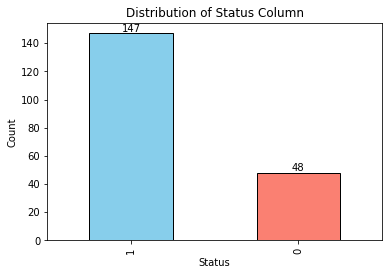

In [8]:
status_counts = data['status'].value_counts()

# Plotting the bar chart
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column')

# Annotating the bars with their counts
for i, count in enumerate(status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


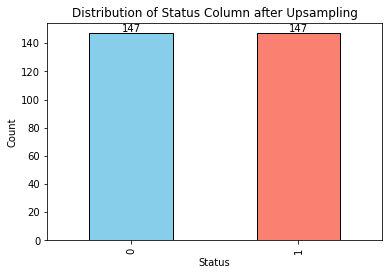

In [9]:
from sklearn.utils import resample
majority_class = data[data['status'] == 1]
minority_class = data[data['status'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Count the occurrences of each value in the "status" column after upsampling
status_counts_upsampled = upsampled_data['status'].value_counts()

# Plotting the bar chart
ax = status_counts_upsampled.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column after Upsampling')

# Annotating the bars with their counts
for i, count in enumerate(status_counts_upsampled):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [10]:
# load the dataset
data = pd.read_csv("D:\\Data\Parkin.csv")
data
data = data.drop('name', axis=1)

PermissionError: [Errno 13] Permission denied: 'D:\\Data\\Parkin.csv'

In [ ]:
data

In [ ]:
status_counts = data['status'].value_counts()

# Plotting the bar chart
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column')

# Annotating the bars with their counts
for i, count in enumerate(status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


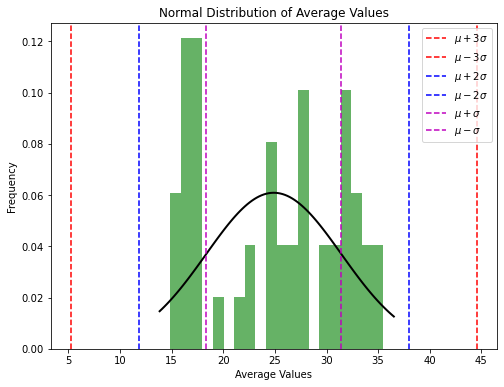

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming 'data' is your DataFrame containing the relevant data
# Calculate average value of each row
data['row_average'] = data.mean(axis=1)

# Filter rows where status is 0
data_status_0 = data[data['status'] == 0]

# Plotting the histogram of average values
plt.figure(figsize=(8, 6))  # Adjust size if necessary
plt.hist(data_status_0['row_average'], bins=20, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the data
mu, std = norm.fit(data_status_0['row_average'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plotting the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

# Plotting lines for mu +/- sigma, mu +/- 2sigma, and mu +/- 3sigma
plt.axvline(mu + 3 * std, color='r', linestyle='--', label=r'$\mu + 3\sigma$')
plt.axvline(mu - 3 * std, color='r', linestyle='--', label=r'$\mu - 3\sigma$')
plt.axvline(mu + 2 * std, color='b', linestyle='--', label=r'$\mu + 2\sigma$')
plt.axvline(mu - 2 * std, color='b', linestyle='--', label=r'$\mu - 2\sigma$')
plt.axvline(mu + std, color='m', linestyle='--', label=r'$\mu + \sigma$')
plt.axvline(mu - std, color='m', linestyle='--', label=r'$\mu - \sigma$')

plt.xlabel('Average Values')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Average Values')
plt.legend()

plt.show()

In [12]:
# Filter rows within the range mu-sigma to mu+sigma
data_within_sigma = data_status_0[
    (data_status_0['row_average'] >= mu - std) &
    (data_status_0['row_average'] <= mu + std)
]

# Display the filtered rows
print(data_within_sigma)


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
30       197.076       206.896       192.055         0.00289   
31       199.228       209.512       192.091         0.00241   
32       198.383       215.203       193.104         0.00212   
33       202.266       211.604       197.079         0.00180   
34       203.184       211.526       196.160         0.00178   
35       201.464       210.565       195.708         0.00198   
47       252.455       261.487       182.786         0.00185   
60       209.144       237.494       109.379         0.00282   
61       223.365       238.987        98.664         0.00264   
62       222.236       231.345       205.495         0.00266   
63       228.832       234.619       223.634         0.00296   
65       228.969       239.541       113.201         0.00238   
165      236.200       244.663       102.137         0.00277   
168      197.569       217.627        90.794         0.00803   
169      240.301       245.135       219

In [13]:
print(data_status_0)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
30       197.076       206.896       192.055         0.00289   
31       199.228       209.512       192.091         0.00241   
32       198.383       215.203       193.104         0.00212   
33       202.266       211.604       197.079         0.00180   
34       203.184       211.526       196.160         0.00178   
35       201.464       210.565       195.708         0.00198   
42       237.226       247.326       225.227         0.00298   
43       241.404       248.834       232.483         0.00281   
44       243.439       250.912       232.435         0.00210   
45       242.852       255.034       227.911         0.00225   
46       245.510       262.090       231.848         0.00235   
47       252.455       261.487       182.786         0.00185   
48       122.188       128.611       115.765         0.00524   
49       122.964       130.049       114.676         0.00428   
50       124.445       135.069       117

In [14]:
import numpy as np

# Calculate the Euclidean distance for each row
distances = np.sqrt(((data_status_0.drop(columns=['row_average']).values - np.array(data_status_0['row_average']).reshape(-1, 1)) ** 2).sum(axis=1))

# Display the calculated distances
print("Euclidean distance for each row:")
print(distances)


Euclidean distance for each row:
[320.40159584 323.06956702 326.35145053 328.49288952 328.5149489
 326.70360964 381.63043496 388.37014257 390.59040576 390.30578771
 397.76147984 379.15867807 197.3146926  198.07981423 203.18055913
 201.38475871 209.08248134 209.10874964 313.47957419 320.41722255
 354.47616866 369.13926454 378.22796887 327.87950508 332.92723072
 381.68921656 410.1751507  288.27845783 379.36866298 407.14554071
 190.364806   175.09793321 176.81058752 196.99220383 187.09609536
 191.25258705 187.39229275 249.80763058 218.09264747 585.80839365
 576.32863644 174.38610596 320.42584055 285.28053088 319.73411034
 287.99172858 427.30933224 325.55947277]


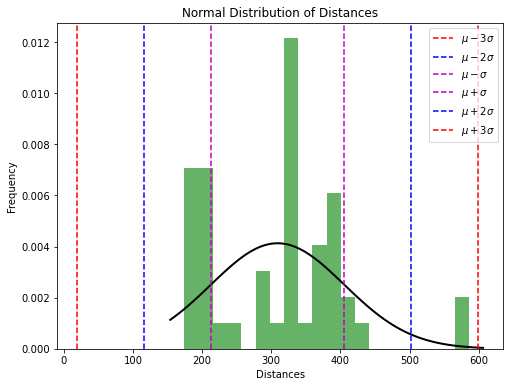

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Fit a normal distribution to the calculated distances
mu, std = norm.fit(distances)

# Plotting the histogram of distances
plt.figure(figsize=(8, 6))  # Adjust size if necessary
plt.hist(distances, bins=20, density=True, alpha=0.6, color='g')

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Plotting lines for mu +/- sigma, mu +/- 2sigma, and mu +/- 3sigma
plt.axvline(mu - 3 * std, color='r', linestyle='--', label=r'$\mu - 3\sigma$')
plt.axvline(mu - 2 * std, color='b', linestyle='--', label=r'$\mu - 2\sigma$')
plt.axvline(mu - std, color='m', linestyle='--', label=r'$\mu - \sigma$')
plt.axvline(mu + std, color='m', linestyle='--', label=r'$\mu + \sigma$')
plt.axvline(mu + 2 * std, color='b', linestyle='--', label=r'$\mu + 2\sigma$')
plt.axvline(mu + 3 * std, color='r', linestyle='--', label=r'$\mu + 3\sigma$')

# Adding labels and title
plt.xlabel('Distances')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Distances')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [16]:
# Calculate the Euclidean distance for each row
distances = np.sqrt(((data_status_0.drop(columns=['row_average']).values - np.array(data_status_0['row_average']).reshape(-1, 1)) ** 2).sum(axis=1))

# Filter rows within the range mu-sigma to mu+sigma
rows_within_sigma = data_status_0[(distances >= mu - std) & (distances <= mu + std)]


rows_within_sigma = rows_within_sigma.drop('row_average', axis=1)
print(rows_within_sigma)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
30       197.076       206.896       192.055         0.00289   
31       199.228       209.512       192.091         0.00241   
32       198.383       215.203       193.104         0.00212   
33       202.266       211.604       197.079         0.00180   
34       203.184       211.526       196.160         0.00178   
35       201.464       210.565       195.708         0.00198   
42       237.226       247.326       225.227         0.00298   
43       241.404       248.834       232.483         0.00281   
44       243.439       250.912       232.435         0.00210   
45       242.852       255.034       227.911         0.00225   
46       245.510       262.090       231.848         0.00235   
47       252.455       261.487       182.786         0.00185   
60       209.144       237.494       109.379         0.00282   
61       223.365       238.987        98.664         0.00264   
62       222.236       231.345       205

In [17]:
# Assuming 'data_with_sigma' is your DataFrame containing the relevant data
# Assuming 'rows_within_sigma' is the DataFrame with rows within the range mu-sigma to mu+sigma

# Merge the two DataFrames on common columns
common_rows = pd.merge(data_within_sigma, rows_within_sigma, how='inner')

# Display the common rows
#print("Common rows:")
#print(common_rows)

common_rows = common_rows.drop('row_average', axis=1)

# Display the modified DataFrame
print("Common rows without 'row_average' column:")
print(common_rows)

Common rows without 'row_average' column:
    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0       197.076       206.896       192.055         0.00289          0.000010   
1       199.228       209.512       192.091         0.00241          0.000010   
2       198.383       215.203       193.104         0.00212          0.000010   
3       202.266       211.604       197.079         0.00180          0.000009   
4       203.184       211.526       196.160         0.00178          0.000009   
5       201.464       210.565       195.708         0.00198          0.000010   
6       252.455       261.487       182.786         0.00185          0.000007   
7       209.144       237.494       109.379         0.00282          0.000010   
8       223.365       238.987        98.664         0.00264          0.000010   
9       222.236       231.345       205.495         0.00266          0.000010   
10      228.832       234.619       223.634         0.00296        

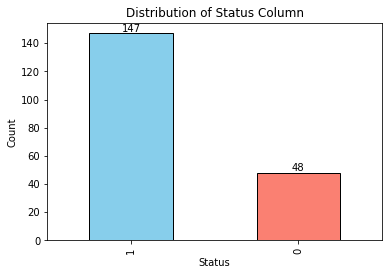

In [19]:
# load the dataset
data = pd.read_csv("E:\\Data\Parkin.csv")
data
data = data.drop('name', axis=1)
status_counts = data['status'].value_counts()

# Plotting the bar chart
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column')

# Annotating the bars with their counts
for i, count in enumerate(status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


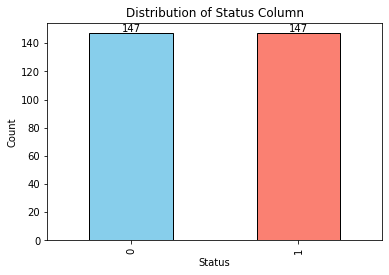

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("E:\\Data\Parkin.csv")

# Drop the 'name' column
data = data.drop('name', axis=1)

# Assuming 'common_rows' contains the common rows between the majority and minority classes

# Add common rows to the minority class 4 times
for _ in range(4):
    data = pd.concat([data, common_rows])

# Add additional 15 common rows to the minority class
data = pd.concat([data, common_rows.sample(n=15, replace=True)])

# Plotting the bar chart
status_counts = data['status'].value_counts()
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Column')

# Annotating the bars with their counts
for i, count in enumerate(status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [22]:
print(data)

    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0       119.992       157.302        74.997         0.00784          0.000070   
1       122.400       148.650       113.819         0.00968          0.000080   
2       116.682       131.111       111.555         0.01050          0.000090   
3       116.676       137.871       111.366         0.00997          0.000090   
4       116.014       141.781       110.655         0.01284          0.000110   
..          ...           ...           ...             ...               ...   
6       252.455       261.487       182.786         0.00185          0.000007   
11      228.969       239.541       113.201         0.00238          0.000010   
7       209.144       237.494       109.379         0.00282          0.000010   
1       199.228       209.512       192.091         0.00241          0.000010   
17      174.188       230.978        94.261         0.00459          0.000030   

    MDVP:RAP  MDVP:PPQ  Jit

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'data' contains the dataset with the 'status' column as the target variable

# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['status'])
y = data['status']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8813559322033898
Precision: 0.8666666666666667
Recall: 0.896551724137931
F1 Score: 0.8813559322033899
Confusion Matrix:
[[26  4]
 [ 3 26]]


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# List of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8813559322033898
Precision: 0.8666666666666667
Recall: 0.896551724137931
F1 Score: 0.8813559322033899
Confusion Matrix:
[[26  4]
 [ 3 26]]


Model: DecisionTreeClassifier
Accuracy: 0.9661016949152542
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1 Score: 0.9655172413793104
Confusion Matrix:
[[29  1]
 [ 1 28]]


Model: RandomForestClassifier
Accuracy: 0.9830508474576272
Precision: 0.9666666666666667
Recall: 1.0
F1 Score: 0.983050847457627
Confusion Matrix:
[[29  1]
 [ 0 29]]


Model: SVC
Accuracy: 0.8135593220338984
Precision: 0.8461538461538461
Recall: 0.7586206896551724
F1 Score: 0.8
Confusion Matrix:
[[26  4]
 [ 7 22]]


Model: KNeighborsClassifier
Accuracy: 0.8813559322033898
Precision: 0.9230769230769231
Recall: 0.8275862068965517
F1 Score: 0.8727272727272727
Confusion Matrix:
[[28  2]
 [ 5 24]]




C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
